In [13]:
import pandas as pd


accidents_2005_2007 = pd.read_csv('accidents_2005_to_2007.csv', low_memory=False)
accidents_2009_2011 = pd.read_csv('accidents_2009_to_2011.csv', low_memory=False)
accidents_2012_2014 = pd.read_csv('accidents_2012_to_2014.csv', low_memory=False)


accidents = pd.concat([accidents_2005_2007, accidents_2009_2011, accidents_2012_2014], ignore_index=True)


print(accidents.head())
print(accidents.info())


  Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  200501BS00001               525680.0                178240.0  -0.191170   
1  200501BS00002               524170.0                181650.0  -0.211708   
2  200501BS00003               524520.0                182240.0  -0.206458   
3  200501BS00004               526900.0                177530.0  -0.173862   
4  200501BS00005               528060.0                179040.0  -0.156618   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.489096             1                  2                   1   
1  51.520075             1                  3                   1   
2  51.525301             1                  3                   2   
3  51.482442             1                  3                   1   
4  51.495752             1                  3                   1   

   Number_of_Casualties        Date  ...  \
0                     1  04/01/2005  ...   
1                     1  05/

In [21]:
print(accidents.isnull().sum())

accidents = accidents.fillna({
    'Junction_Control': 'Unknown',
    'Weather_Conditions': 'Unknown',
    'Road_Surface_Conditions': 'Unknown',
    'Pedestrian_Crossing-Human_Control': 'Unknown',
    'Pedestrian_Crossing-Physical_Facilities': 'Unknown',
    'Special_Conditions_at_Site': 'None',
    'Carriageway_Hazards': 'None'
})





Accident_Index                                                                           0
Location_Easting_OSGR                                                                  101
Location_Northing_OSGR                                                                 101
Longitude                                                                              101
Latitude                                                                               101
                                                                                      ... 
Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters            0
Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction      0
Pedestrian_Crossing-Physical_Facilities_Unknown                                          0
Pedestrian_Crossing-Physical_Facilities_Zebra crossing                                   0
Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing                 0

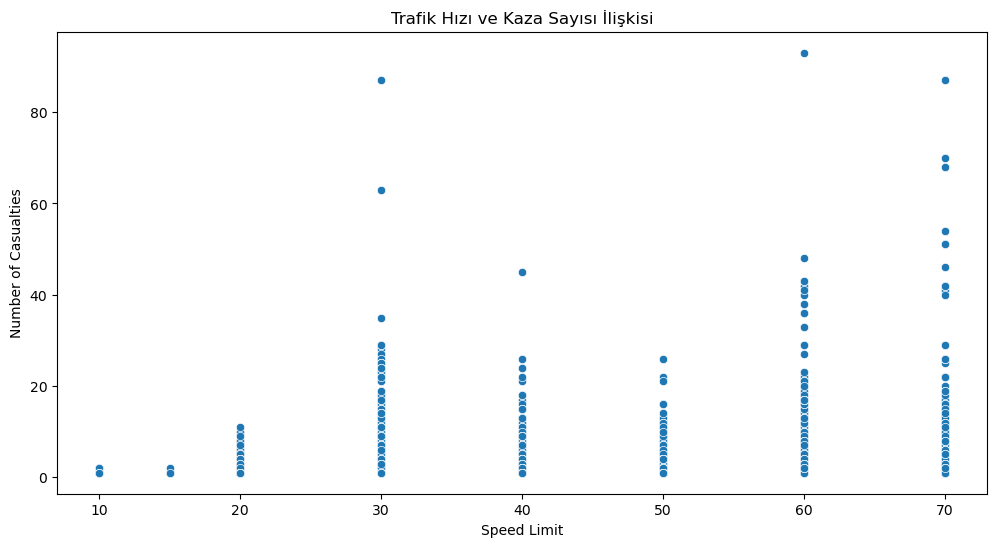

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Speed_limit', y='Number_of_Casualties', data=accidents)
plt.title('Trafik Hızı ve Kaza Sayısı İlişkisi')
plt.xlabel('Speed Limit')
plt.ylabel('Number of Casualties')
plt.show()


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

features = ['Speed_limit']  
X = accidents[features]
y = accidents['Number_of_Casualties']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.7204772153887813
R^2 Score: 0.018984757906733596


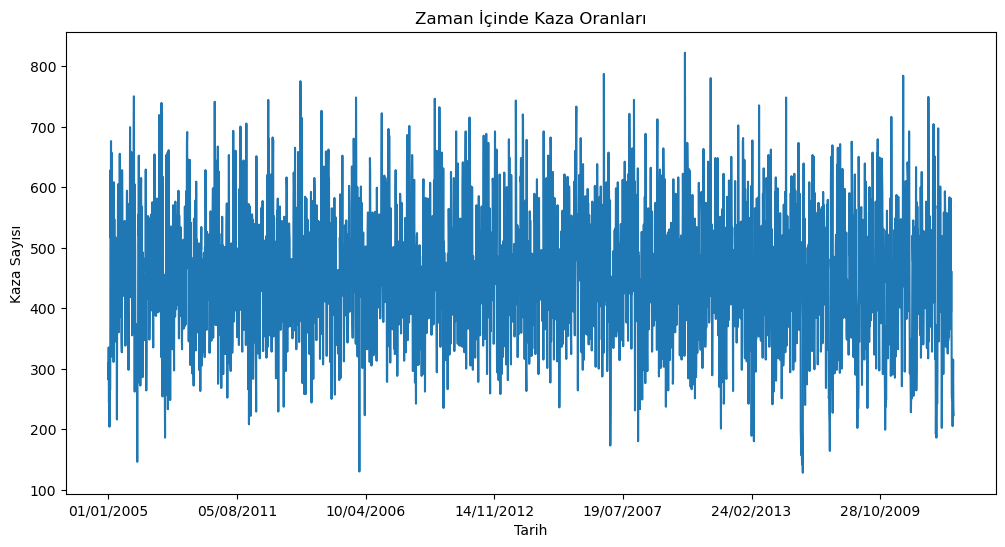

In [47]:
daily_accidents = accidents.groupby('Date').size()

plt.figure(figsize=(12, 6))
daily_accidents.plot()
plt.title('Zaman İçinde Kaza Oranları')
plt.xlabel('Tarih')
plt.ylabel('Kaza Sayısı')
plt.show()





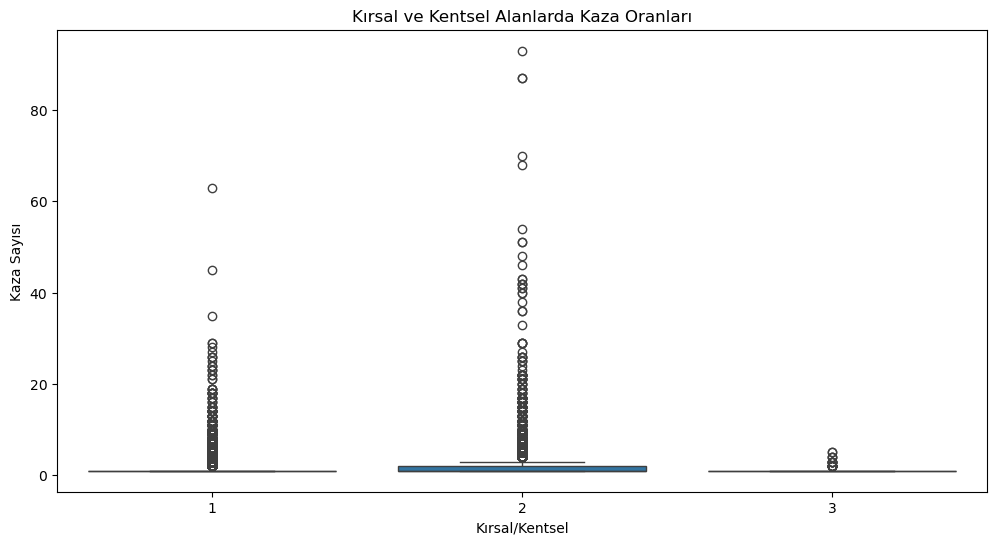

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Urban_or_Rural_Area', y='Number_of_Casualties', data=accidents)
plt.title('Kırsal ve Kentsel Alanlarda Kaza Oranları')
plt.xlabel('Kırsal/Kentsel')
plt.ylabel('Kaza Sayısı')
plt.show()
